In [210]:
import pandas as pd
import numpy as np
import scipy.special as sp
import os
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt
from modplot import velovect
mpl.rc('figure',  figsize=(8, 8))
# mpl.rc('text', usetex=True)
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Comic Sans MS']})
# mpl.rc('mathtext', fontset='stixsans')
# mpl.rc('text.latex', preamble=r'\usepackage{cmbright}')
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.it'] = 'Arial'
mpl.rcParams['mathtext.bf'] = 'Arial'
hfont = {'fontname':'Arial'}

In [45]:
def force(dist,b1,b2):
    return b1/(dist**2) + b2/(dist**3)

0.0 1.0


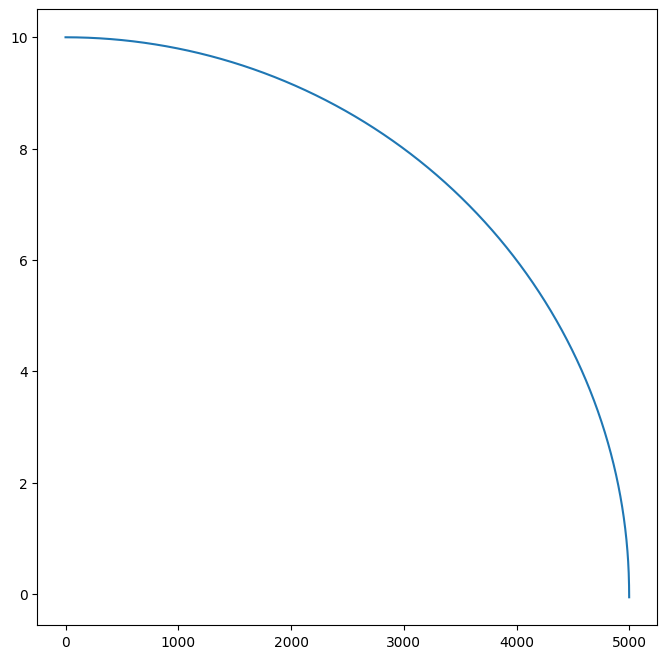

In [57]:
pos1 = 10
pos0 = 0
relvel = 0.0
p = 1.0
dist = pos1-pos0
dt = 0.02
dist_t = []
relvel_t = []
b1 = np.linspace(0,0,1)
b2 = np.linspace(0,1,2)
for i in range(len(b1)):
    for j in range(len(b2)):
        relvel = 0.0
        dist = pos1-pos0
        dist_t = []
        relvel_t = []
        for kk in range(10000):
            relvel -= p*force(dist,b1[i],b2[j]) * dt
            dist += relvel*dt

            dist_t.append(dist)
            relvel_t.append(relvel)
            if(dist < 0): 
                print(b1[i],b2[j])
                plt.plot(dist_t)
                break

In [472]:
B1 = 1
beta = 1
B2 = B1*beta
# vl = [-np.sqrt(4*np.pi/3) * B1, -(2.0/3.0) * np.sqrt(np.pi/5) * B2]
# vl = [-np.sqrt(4*np.pi/3) * B1, -1000*(2.0/3.0) * np.sqrt(4*np.pi/3) * B2]
vl = [1, 0]
radius = 50
def vlm(l,m,theta,phi):
    return np.sqrt(4*np.pi/(2*l + 1)) * float(sp.sph_harm(m,l,theta,phi))*vl[l-1]

def ulm_near(relPos,l,m):
    epsilon = (relPos-2*radius)/radius
    Vlm = l*(l+1)/2.0 * ((-1)**l + 1)* vlm(l,m,0,0)
    Wlm = l*(l+1)/2.0 * ((-1)**l - 1)* vlm(l,m,0,0)
    ans = -epsilon*np.log(epsilon) * Vlm
    if l==1:
        ans += Wlm/3.0
    return ans 

def ulm_far(relPos,l,m):
    r = relPos/radius
    if l == 1:
        return -(2.0/3.0) * (r**(-3)) * vlm(l,m,0,0)
    else:
        return 3.0 * (r**(-2)) * vlm(2,m,0,0)
cutoffDistance = radius*3
cutoffSlope = 1

C:\Users\KIBOU\AppData\Local\Temp\ipykernel_19712\2712888814.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.sqrt(4*np.pi/(2*l + 1)) * float(sp.sph_harm(m,l,theta,phi))*vl[l-1]
C:\Users\KIBOU\AppData\Local\Temp\ipykernel_19712\2935776096.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  vel1_near += ulm_near(relPos,l,m)*float(sp.sph_harm(m,l,0,np.pi))
C:\Users\KIBOU\AppData\Local\Temp\ipykernel_19712\2935776096.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  vel2_near += ulm_near(relPos,l,m)*float(sp.sph_harm(m,l,0,0))
C:\Users\KIBOU\AppData\Local\Temp\ipykernel_19712\2935776096.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  vel1_far += ulm_far(relPos,l,m)*float(sp.sph_harm(m,l,0,np.pi))
C:\Users\KIBOU\AppData\Local\Temp\ipykernel_19712\2935776096.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  vel2_f

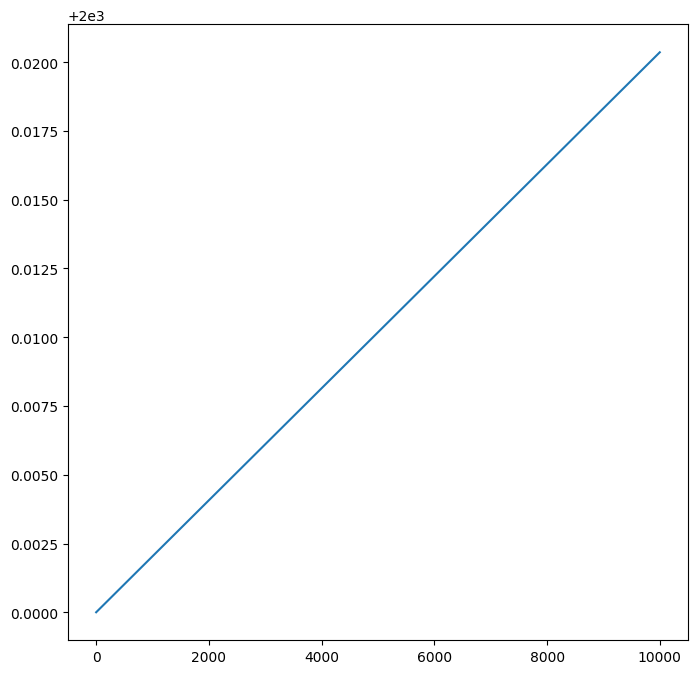

In [473]:
# pos1_near = 200
# pos2_near = 0
# pos1_far = 200
# pos2_far = 0
pos1 = 2000
pos2 = 0
dt = 0.2
ls = [1,2]
dist_near = []
dist_far = []
dist = []
loopCount = 10000
for kk in range(loopCount):
    # print(kk/loopCount)
    vel1_near = 0.0
    vel2_near = 0.0
    vel1_far = 0.0
    vel2_far = 0.0
    for l in ls:
        for m in range(-l,l+1):
            # relPos_near = np.abs(pos2_near-pos1_near)
            # vel1_near += ulm_near(relPos_near,l,m)*sp.sph_harm(m,l,0,np.pi)
            # vel2_near += ulm_near(relPos_near,l,m)*sp.sph_harm(m,l,0,0)
            # relPos_far = np.abs(pos2_far-pos1_far)
            # vel1_far += ulm_far(relPos_far,l,m)*sp.sph_harm(m,l,0,np.pi)
            # vel2_far += ulm_far(relPos_far,l,m)*sp.sph_harm(m,l,0,0)
            relPos = np.abs(pos2-pos1)
            vel1_near += ulm_near(relPos,l,m)*float(sp.sph_harm(m,l,0,np.pi))
            vel2_near += ulm_near(relPos,l,m)*float(sp.sph_harm(m,l,0,0))
            vel1_far += ulm_far(relPos,l,m)*float(sp.sph_harm(m,l,0,np.pi))
            vel2_far += ulm_far(relPos,l,m)*float(sp.sph_harm(m,l,0,0))
    tnh = (np.tanh((relPos-cutoffDistance)/cutoffSlope) + 1.0)/2.0
    vel1 = vel1_far*tnh + vel1_near*(1-tnh)
    vel2 = vel2_far*tnh + vel2_near*(1-tnh)
    # pos1_near += vel1_near*dt
    # pos2_near += vel2_near*dt
    # pos1_far += vel1_far*dt
    # pos2_far += vel2_far*dt
    pos1 += vel1*dt
    pos2 += vel2*dt
    relPos = np.abs(pos2-pos1)
    # dist_near.append(relPos_near)
    # dist_far.append(relPos_far)
    dist.append(relPos)
    if relPos < 2*radius:
        break
# plt.plot(dist_near)
# plt.plot(dist_far)
# plt.plot([0,loopCount],[cutoffDistance,cutoffDistance])
# plt.ylim(100,200)
plt.plot(dist)

In [487]:
sp.sph_harm(0,2,np.pi,0)
# sp.sph_harm(2,2,0,0)

(0.6307831305050401+0j)

C:\Users\KIBOU\AppData\Local\Temp\ipykernel_19712\454649596.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.sqrt(4*np.pi/(2*l + 1)) * float(sp.sph_harm(m,l,theta,phi))*vl[l-1]


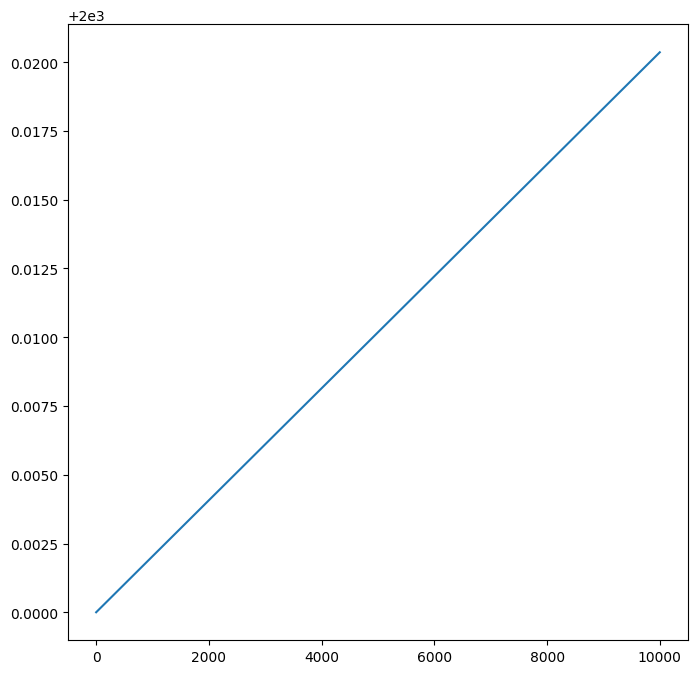

In [471]:
# pos1_near = 200
# pos2_near = 0
# pos1_far = 200
# pos2_far = 0
pos1 = 2000
pos2 = 0

dt = 0.2
ls = [1,2]
dist_near = []
dist_far = []
dist = []
loopCount = 10000
for kk in range(loopCount):
    # print(kk/loopCount)
    vel1_near = 0.0
    vel2_near = 0.0
    vel1_far = 0.0
    vel2_far = 0.0
    for l in ls:
        for m in range(-l,l+1):
            # relPos_near = np.abs(pos2_near-pos1_near)
            # vel1_near += ulm_near(relPos_near,l,m)*sp.sph_harm(m,l,0,np.pi)
            # vel2_near += ulm_near(relPos_near,l,m)*sp.sph_harm(m,l,0,0)
            # relPos_far = np.abs(pos2_far-pos1_far)
            # vel1_far += ulm_far(relPos_far,l,m)*sp.sph_harm(m,l,0,np.pi)
            # vel2_far += ulm_far(relPos_far,l,m)*sp.sph_harm(m,l,0,0)
            relPos = np.abs(pos2-pos1)
            vel1_near += ulm_near(relPos,l,m)*sp.sph_harm(m,l,0,np.pi)
            vel2_near += ulm_near(relPos,l,m)*sp.sph_harm(m,l,0,0)
            vel1_far += ulm_far(relPos,l,m)*sp.sph_harm(m,l,0,np.pi)
            vel2_far += ulm_far(relPos,l,m)*sp.sph_harm(m,l,0,0)
    tnh = (np.tanh((relPos-cutoffDistance)/cutoffSlope) + 1.0)/2.0
    vel1 = vel1_far*tnh + vel1_near*(1-tnh)
    vel2 = vel2_far*tnh + vel2_near*(1-tnh)
    # pos1_near += vel1_near*dt
    # pos2_near += vel2_near*dt
    # pos1_far += vel1_far*dt
    # pos2_far += vel2_far*dt
    pos1 += vel1*dt
    pos2 += vel2*dt
    relPos = np.abs(pos2-pos1)
    # dist_near.append(relPos_near)
    # dist_far.append(relPos_far)
    dist.append(relPos)
    if relPos < 2*radius:
        break
# plt.plot(dist_near)
# plt.plot(dist_far)
# plt.plot([0,loopCount],[cutoffDistance,cutoffDistance])
# plt.ylim(100,200)
plt.plot(dist)

0.0
0.0001
0.0002
0.0003
0.0004
0.0005
0.0006
0.0007
0.0008
0.0009
0.001
0.0011
0.0012
0.0013
0.0014
0.0015
0.0016
0.0017
0.0018
0.0019
0.002
0.0021
0.0022
0.0023
0.0024
0.0025
0.0026
0.0027
0.0028
0.0029
0.003
0.0031
0.0032
0.0033
0.0034
0.0035
0.0036
0.0037
0.0038
0.0039
0.004
0.0041
0.0042
0.0043
0.0044
0.0045
0.0046
0.0047
0.0048
0.0049
0.005
0.0051
0.0052
0.0053
0.0054
0.0055
0.0056
0.0057
0.0058
0.0059
0.006
0.0061
0.0062
0.0063
0.0064
0.0065
0.0066
0.0067
0.0068
0.0069
0.007
0.0071
0.0072
0.0073
0.0074
0.0075
0.0076
0.0077
0.0078
0.0079
0.008
0.0081
0.0082
0.0083
0.0084
0.0085
0.0086
0.0087
0.0088
0.0089
0.009
0.0091
0.0092
0.0093
0.0094
0.0095
0.0096
0.0097
0.0098
0.0099
0.01
0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109
0.011
0.0111
0.0112
0.0113
0.0114
0.0115
0.0116
0.0117
0.0118
0.0119
0.012
0.0121
0.0122
0.0123
0.0124
0.0125
0.0126
0.0127
0.0128
0.0129
0.013
0.0131
0.0132
0.0133
0.0134
0.0135
0.0136
0.0137
0.0138
0.0139
0.014
0.0141
0.0142
0.0143
0.0144
0.0

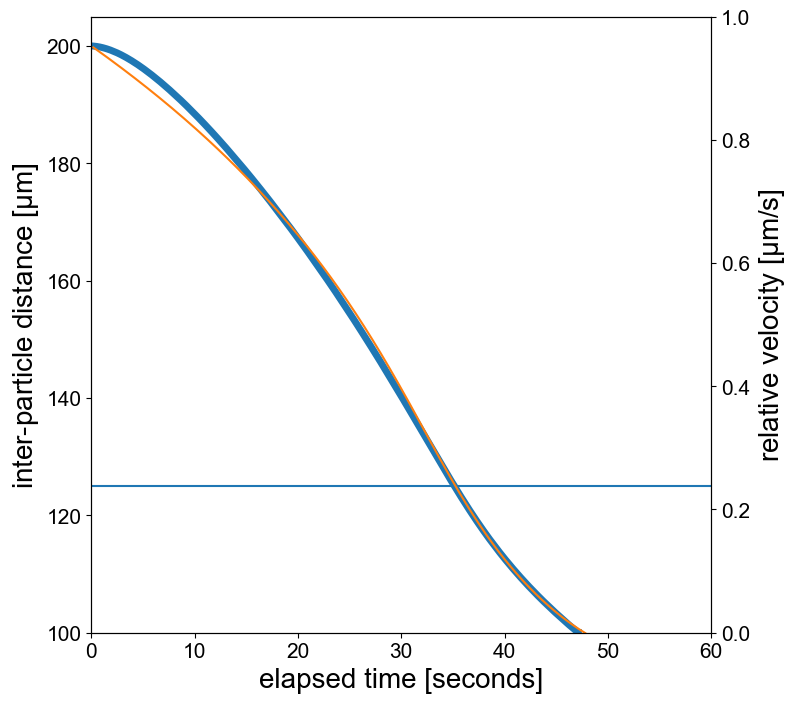

In [211]:
from scipy.optimize import curve_fit
pat = "2023/00/03/"
pat1 = "2023/00/04/"
paths = [pat1]
# path = "2023/00/02/"
# beta = "0"
tickfontsize = 15
ticks_font = mpl.font_manager.FontProperties(family='Arial', style='normal',
size=tickfontsize, weight='normal', stretch='normal')
betas = ["0.5"]
times = [23556]
line_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
labelHeight = [0,0,-1.5,1,0.4]
labelPos = [0,0,30,0,0]
labels = [r"$\beta = 0.2$"]
fig,ax = plt.subplots()
ax2 = ax.twinx()
for k in range(len(betas)):
    path = paths[k]
    beta = betas[k]
    time = times[k]
    td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")
    td *= 10
    tdtime = np.linspace(0,len(td)-1,len(td))/500
    n = 5000
    dtd = np.zeros(len(td)-n)
    dtdtime = np.zeros(len(td)-n)
    for i in range(len(td)-n):
        dtdtime[i]=tdtime[(i+n)]
        # dtdtime[i]=i
        dtd[i]=(((td[i+n]-td[i])/(n/500.0)))

    # dtdtime /= dtdtime.max()
    # dtd /= np.abs(dtd.min())
    # plt.plot(dtdtime,dtd)
    # ax.text((times[k]/2)/500 + labelPos[k], td[len(td)//2] + labelHeight[k]*10, labels[k], fontsize=20, ha='center', va='bottom')
    ax.plot(tdtime,td,label=labels[k],linewidth = 5,color = line_colors[k])
    # if k == 0:
    # ax2.plot(dtdtime,dtd,linewidth = 5,color = line_colors[k],linestyle = (0, (1,)))

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_ylabel("inter-particle distance " + r'$[\mu m]$',fontsize=20,**hfont)
ax2.set_ylabel("relative velocity " + r'$[\mu m/s]$',fontsize=20,**hfont)
ax.set_xlabel("elapsed time [seconds]",fontsize=20,**hfont)
ax.set_xlim(left = 0,right = 60)
ax.set_ylim(bottom = 100)
# Customize the right y-axis label
# plt.savefig('C:\coolbeans\DistanceAndRelativeVelocity.png', dpi=600,bbox_inches='tight')

relPos = 200
radius = 50
# -2.    0.1 100. 
#  -1.12133733   4.94930718 100.        
p1 = -1.12133733
p2 = 4.94930718
p3 = 100
dt = 0.2
time_s = 0.0
time_t = []
dist = []
loopCount = 10000
cutoffDistance = (2+0.5)*radius
cutoffSlope = 22

for kk in range(loopCount):
    print(kk/loopCount)
    r = relPos/radius
    vel_far = p2 * r**(-2) - p3 * r**(-3)
    epsilon = (relPos-2*radius)/radius
    vel_near = -epsilon*np.log(epsilon)*p1
    tnh = (np.tanh((relPos-cutoffDistance)/cutoffSlope) + 1.0)/2.0
    vel = vel_far*tnh + vel_near*(1-tnh)
    relPos += vel*dt
    time_s += dt
    time_t.append(time_s)
    dist.append(relPos)
    if relPos < 2*radius:
        break
# plt.plot(dist_near)
# plt.plot(dist_far)
ax.plot([0,loopCount],[cutoffDistance,cutoffDistance])
ax.plot(np.array(time_t),np.array(dist))


plt.show()

# time = 654689
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

# time = 368968
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

In [534]:
import math
def func(tarray,p1,p2,p3):
    returnArray = []
    for t in tarray:
        relPos = 200
        radius = 50
        dt = 0.2
        loopCount = 10000
        cutoffDistance = (2+0.3)*radius
        cutoffSlope = 20
        time_s = 0.0
        for kk in range(loopCount):
            r = relPos/radius
            vel_far = p2 * r**(-2) - p3 * r**(-3)
            epsilon = (relPos-2*radius)/radius
            vel_near = -epsilon*np.log(epsilon)*p1
            tnh = (np.tanh((relPos-cutoffDistance)/cutoffSlope) + 1.0)/2.0
            vel = vel_far*tnh + vel_near*(1-tnh)
            relPos += vel*dt
            time_s += dt
            if time_s >= t or kk==loopCount-1:
                if math.isnan(relPos) or math.isinf(relPos):
                    relPos = 0
                returnArray.append(relPos)
                break
    return returnArray

0.0
0.0001
0.0002
0.0003
0.0004
0.0005
0.0006
0.0007
0.0008
0.0009
0.001
0.0011
0.0012
0.0013
0.0014
0.0015
0.0016
0.0017
0.0018
0.0019
0.002
0.0021
0.0022
0.0023
0.0024
0.0025
0.0026
0.0027
0.0028
0.0029
0.003
0.0031
0.0032
0.0033
0.0034
0.0035
0.0036
0.0037
0.0038
0.0039
0.004
0.0041
0.0042
0.0043
0.0044
0.0045
0.0046
0.0047
0.0048
0.0049
0.005
0.0051
0.0052
0.0053
0.0054
0.0055
0.0056
0.0057
0.0058
0.0059
0.006
0.0061
0.0062
0.0063
0.0064
0.0065
0.0066
0.0067
0.0068
0.0069
0.007
0.0071
0.0072
0.0073
0.0074
0.0075
0.0076
0.0077
0.0078
0.0079
0.008
0.0081
0.0082
0.0083
0.0084
0.0085
0.0086
0.0087
0.0088
0.0089
0.009
0.0091
0.0092
0.0093
0.0094
0.0095
0.0096
0.0097
0.0098
0.0099
0.01
0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109
0.011
0.0111
0.0112
0.0113
0.0114
0.0115
0.0116
0.0117
0.0118
0.0119
0.012
0.0121
0.0122
0.0123
0.0124
0.0125
0.0126
0.0127
0.0128
0.0129
0.013
0.0131
0.0132
0.0133
0.0134
0.0135
0.0136
0.0137
0.0138
0.0139
0.014
0.0141
0.0142
0.0143
0.0144
0.0

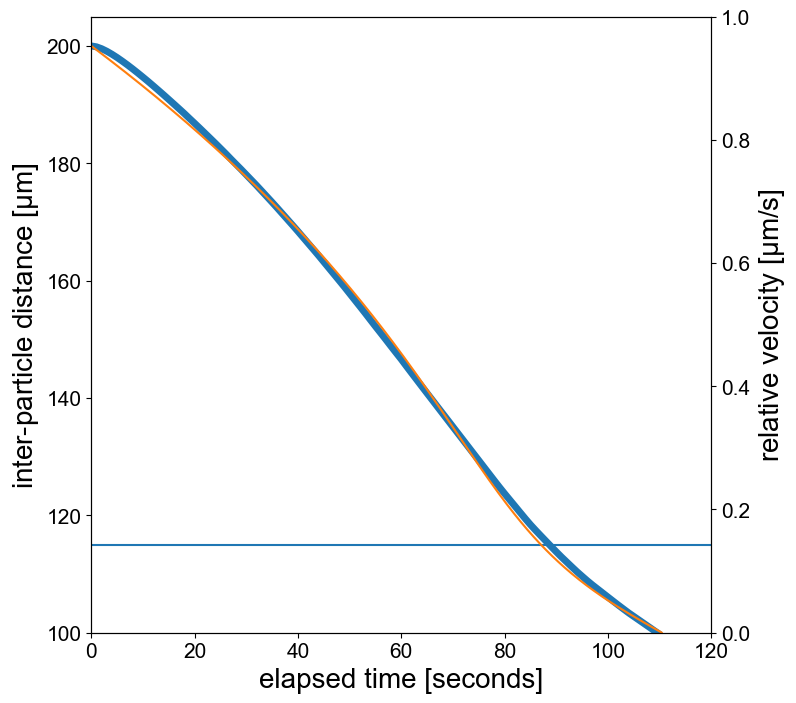

In [533]:
from scipy.optimize import curve_fit
pat = "2023/00/03/"
pat1 = "2023/00/04/"
paths = [pat]
# path = "2023/00/02/"
# beta = "0"
tickfontsize = 15
ticks_font = mpl.font_manager.FontProperties(family='Arial', style='normal',
size=tickfontsize, weight='normal', stretch='normal')
betas = ["0.1"]
times = [109517]
line_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
labelHeight = [0,0,-1.5,1,0.4]
labelPos = [0,0,30,0,0]
labels = [r"$\beta = 0.2$"]
fig,ax = plt.subplots()
ax2 = ax.twinx()
for k in range(len(betas)):
    path = paths[k]
    beta = betas[k]
    time = times[k]
    td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")
    td *= 10
    tdtime = np.linspace(0,len(td)-1,len(td))/1000

    # dtdtime /= dtdtime.max()
    # dtd /= np.abs(dtd.min())
    # plt.plot(dtdtime,dtd)
    # ax.text((times[k]/2)/500 + labelPos[k], td[len(td)//2] + labelHeight[k]*10, labels[k], fontsize=20, ha='center', va='bottom')
    # ax.plot(tdtime,td,label=labels[k],linewidth = 5,color = line_colors[k])
    # if k == 0:
    # ax2.plot(dtdtime,dtd,linewidth = 5,color = line_colors[k],linestyle = (0, (1,)))

td_sampled = []
tdtime_sampled = []
sampleStep = 1000
index = 0
while True:
    td_sampled.append(td[index])
    tdtime_sampled.append(tdtime[index])
    index += sampleStep
    if index >= len(td)-1:
        td_sampled.append(td[len(td)-1])
        tdtime_sampled.append(tdtime[len(td)-1])
        break
ax.plot(tdtime_sampled,td_sampled,label=labels[k],linewidth = 5,color = line_colors[k])

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_ylabel("inter-particle distance " + r'$[\mu m]$',fontsize=20,**hfont)
ax2.set_ylabel("relative velocity " + r'$[\mu m/s]$',fontsize=20,**hfont)
ax.set_xlabel("elapsed time [seconds]",fontsize=20,**hfont)
ax.set_xlim(left = 0,right = 120)
ax.set_ylim(bottom = 100)
# Customize the right y-axis label
# plt.savefig('C:\coolbeans\DistanceAndRelativeVelocity.png', dpi=600,bbox_inches='tight')
# p1 = -1
# p2 = 2
# p3 = 85
# popt, pcov = curve_fit(func, tdtime_sampled, td_sampled,bounds = ((-0.5,-10,9),(0,-6,14)))
# # popt, pcov = curve_fit(func, tdtime, td)
# print(popt)
relPos = 200
radius = 50
# -2.    0.1 100. 
# p1 = popt[0]
# p2 = popt[1]
# p3 = popt[2]

p1 = 0.7
p2 = -9.9
p3 = 2.8
# p1 = -0.3
# p2 = -7
# p3 = 11
dt = 0.2
time_s = 0.0
time_t = []
dist = []
loopCount = 10000
cutoffDistance = (2+0.3)*radius
cutoffSlope = 20

for kk in range(loopCount):
    print(kk/loopCount)
    r = relPos/radius
    vel_far = p2 * r**(-2) - p3 * r**(-3)
    epsilon = (relPos-2*radius)/radius
    vel_near = -epsilon*np.log(epsilon)*p1
    tnh = (np.tanh((relPos-cutoffDistance)/cutoffSlope) + 1.0)/2.0
    vel = vel_far*tnh + vel_near*(1-tnh)
    relPos += vel*dt
    time_s += dt
    time_t.append(time_s)
    dist.append(relPos)
    if relPos < 2*radius:
        break
# plt.plot(dist_near)
# plt.plot(dist_far)
ax.plot([0,loopCount],[cutoffDistance,cutoffDistance])
ax.plot(np.array(time_t),np.array(dist))
plt.show()

# time = 654689
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

# time = 368968
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

0.0
0.0001
0.0002
0.0003
0.0004
0.0005
0.0006
0.0007
0.0008
0.0009
0.001
0.0011
0.0012
0.0013
0.0014
0.0015
0.0016
0.0017
0.0018
0.0019
0.002
0.0021
0.0022
0.0023
0.0024
0.0025
0.0026
0.0027
0.0028
0.0029
0.003
0.0031
0.0032
0.0033
0.0034
0.0035
0.0036
0.0037
0.0038
0.0039
0.004
0.0041
0.0042
0.0043
0.0044
0.0045
0.0046
0.0047
0.0048
0.0049
0.005
0.0051
0.0052
0.0053
0.0054
0.0055
0.0056
0.0057
0.0058
0.0059
0.006
0.0061
0.0062
0.0063
0.0064
0.0065
0.0066
0.0067
0.0068
0.0069
0.007
0.0071
0.0072
0.0073
0.0074
0.0075
0.0076
0.0077
0.0078
0.0079
0.008
0.0081
0.0082
0.0083
0.0084
0.0085
0.0086
0.0087
0.0088
0.0089
0.009
0.0091
0.0092
0.0093
0.0094
0.0095
0.0096
0.0097
0.0098
0.0099
0.01
0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109
0.011
0.0111
0.0112
0.0113
0.0114
0.0115
0.0116
0.0117
0.0118
0.0119
0.012
0.0121
0.0122
0.0123
0.0124
0.0125
0.0126
0.0127
0.0128
0.0129
0.013
0.0131
0.0132
0.0133
0.0134
0.0135
0.0136
0.0137
0.0138
0.0139
0.014
0.0141
0.0142
0.0143
0.0144
0.0

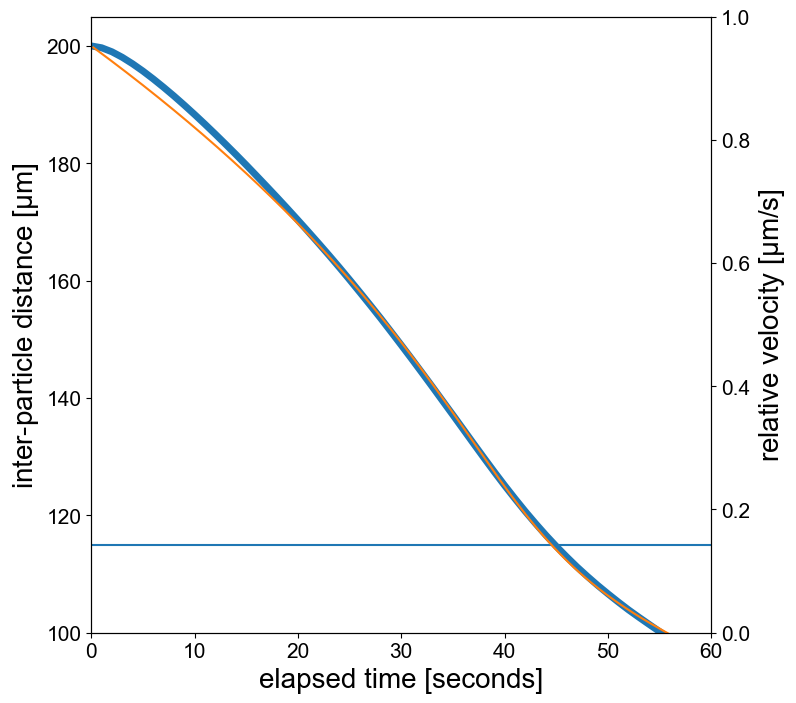

In [542]:
from scipy.optimize import curve_fit
pat = "2023/00/03/"
pat1 = "2023/00/04/"
paths = [pat1]
# path = "2023/00/02/"
# beta = "0"
tickfontsize = 15
ticks_font = mpl.font_manager.FontProperties(family='Arial', style='normal',
size=tickfontsize, weight='normal', stretch='normal')
betas = ["0.2"]
times = [55146]
line_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
labelHeight = [0,0,-1.5,1,0.4]
labelPos = [0,0,30,0,0]
labels = [r"$\beta = 0.2$"]
fig,ax = plt.subplots()
ax2 = ax.twinx()
for k in range(len(betas)):
    path = paths[k]
    beta = betas[k]
    time = times[k]
    td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")
    td *= 10
    tdtime = np.linspace(0,len(td)-1,len(td))/1000

    # dtdtime /= dtdtime.max()
    # dtd /= np.abs(dtd.min())
    # plt.plot(dtdtime,dtd)
    # ax.text((times[k]/2)/500 + labelPos[k], td[len(td)//2] + labelHeight[k]*10, labels[k], fontsize=20, ha='center', va='bottom')
    # ax.plot(tdtime,td,label=labels[k],linewidth = 5,color = line_colors[k])
    # if k == 0:
    # ax2.plot(dtdtime,dtd,linewidth = 5,color = line_colors[k],linestyle = (0, (1,)))

td_sampled = []
tdtime_sampled = []
sampleStep = 1000
index = 0
while True:
    td_sampled.append(td[index])
    tdtime_sampled.append(tdtime[index])
    index += sampleStep
    if index >= len(td)-1:
        td_sampled.append(td[len(td)-1])
        tdtime_sampled.append(tdtime[len(td)-1])
        break
ax.plot(tdtime_sampled,td_sampled,label=labels[k],linewidth = 5,color = line_colors[k])

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_ylabel("inter-particle distance " + r'$[\mu m]$',fontsize=20,**hfont)
ax2.set_ylabel("relative velocity " + r'$[\mu m/s]$',fontsize=20,**hfont)
ax.set_xlabel("elapsed time [seconds]",fontsize=20,**hfont)
ax.set_xlim(left = 0,right = 60)
ax.set_ylim(bottom = 100)
# Customize the right y-axis label
# plt.savefig('C:\coolbeans\DistanceAndRelativeVelocity.png', dpi=600,bbox_inches='tight')
# p1 = -1
# p2 = 2
# p3 = 85
# popt, pcov = curve_fit(func, tdtime_sampled, td_sampled,bounds = ((-0.5,-10,9),(0,-6,14)))
# # popt, pcov = curve_fit(func, tdtime, td)
# print(popt)
relPos = 200
radius = 50
# -2.    0.1 100. 
# p1 = popt[0]
# p2 = popt[1]
# p3 = popt[2]

p1 = 0.6
p2 = -20
p3 = 3
# p1 = -0.3
# p2 = -7
# p3 = 11
dt = 0.2
time_s = 0.0
time_t = []
dist = []
loopCount = 10000
cutoffDistance = (2+0.3)*radius
cutoffSlope = 20

for kk in range(loopCount):
    print(kk/loopCount)
    r = relPos/radius
    vel_far = p2 * r**(-2) - p3 * r**(-3)
    epsilon = (relPos-2*radius)/radius
    vel_near = -epsilon*np.log(epsilon)*p1
    tnh = (np.tanh((relPos-cutoffDistance)/cutoffSlope) + 1.0)/2.0
    vel = vel_far*tnh + vel_near*(1-tnh)
    relPos += vel*dt
    time_s += dt
    time_t.append(time_s)
    dist.append(relPos)
    if relPos < 2*radius:
        break
# plt.plot(dist_near)
# plt.plot(dist_far)
ax.plot([0,loopCount],[cutoffDistance,cutoffDistance])
ax.plot(np.array(time_t),np.array(dist))
plt.show()

# time = 654689
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

# time = 368968
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

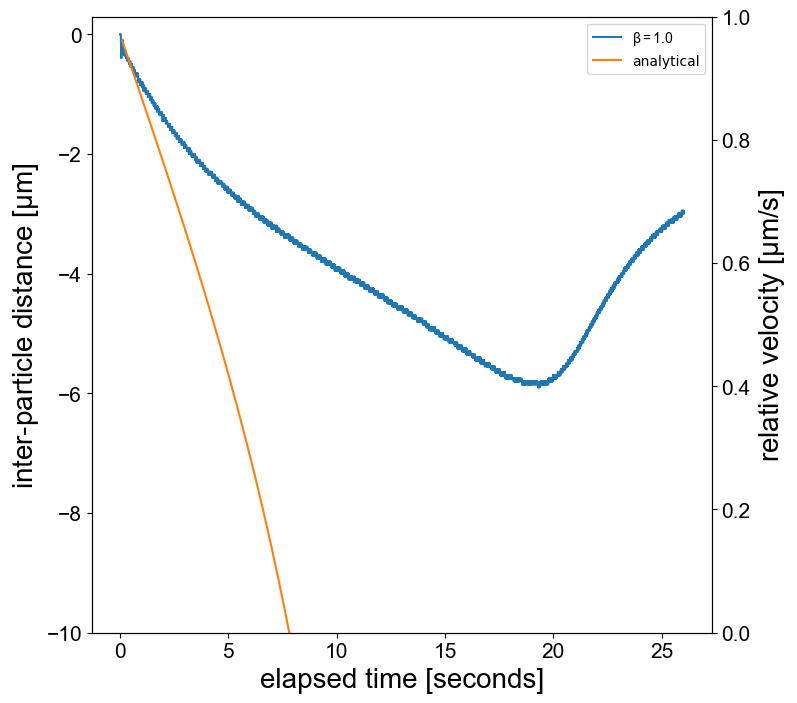

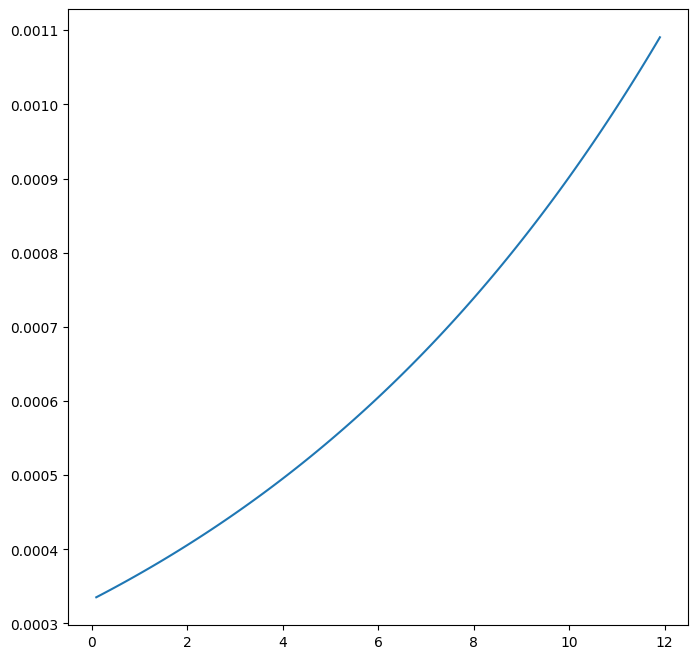

In [628]:
pat = "2023/00/03/"
pat1 = "2023/00/04/"
paths = [pat1]
# path = "2023/00/02/"
# beta = "0"
tickfontsize = 15
ticks_font = mpl.font_manager.FontProperties(family='Arial', style='normal',
size=tickfontsize, weight='normal', stretch='normal')
betas = ["1.0"]
times = [13007]
line_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
labelHeight = [1]
labelPos = [0]
labels = [r"$\beta = 1.0$"]
fig,ax = plt.subplots()
ax2 = ax.twinx()
for k in range(len(betas)):
    path = paths[k]
    beta = betas[k]
    time = times[k]
    td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
    td *= 10
    tdtime = np.linspace(0,len(td)-1,len(td))/500
    n = 1
    dtd = np.zeros(len(td)-n)
    dtdtime = np.zeros(len(td)-n)
    for i in range(len(td)-n):
        dtdtime[i]=tdtime[(i+n)]
        # dtdtime[i]=i
        dtd[i]=(((td[i+n]-td[i])/(n/500.0)))

    # dtdtime /= dtdtime.max()
    # dtd /= np.abs(dtd.min())
    # plt.plot(dtdtime,dtd)
    # ax.text((times[k]/2)/500 + labelPos[k], td[len(td)//2] + labelHeight[k]*10, labels[k], fontsize=20, ha='center', va='bottom')
    # ax.plot(tdtime,td,label=labels[k],linewidth = 5,color = line_colors[k])
    ax.plot(dtdtime,dtd,label=labels[k])
    # if k == 0:
    # ax2.plot(dtdtime,dtd,linewidth = 5,color = line_colors[k],linestyle = (0, (1,)))

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax2.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_ylabel("inter-particle distance " + r'$[\mu m]$',fontsize=20,**hfont)
ax2.set_ylabel("relative velocity " + r'$[\mu m/s]$',fontsize=20,**hfont)
ax.set_xlabel("elapsed time [seconds]",fontsize=20,**hfont)
# ax.set_xlim(left = 0,right = 50)
ax.set_ylim(bottom = -10)
# Customize the right y-axis label
# plt.savefig('C:\coolbeans\DistanceAndRelativeVelocity.png', dpi=600,bbox_inches='tight')

pos1 = 100
pos0 = 0
relvel = 0.0
p1 = 1.0
p4 = 0
p2 = 30.0
p3 = 0
dist = pos1-pos0
dt = 0.1
time = []
time_s = 0.0
dist_t = []
relvel_t = []
tnh_t = []
for kk in range(1000000):
    tnh = (np.tanh((time_s-80)/20) + 1.0)/2.0
    relvel -= p1/(((dist+100)/50)**2) * dt * (1-tnh)*2
    relvel -= p2/(((dist+100)/50)**3) * dt * (1-tnh)*2
    # relvel -= p4*dist*np.log(dist) * dt * tnh
    # relvel -= p2/((dist+100)**3) * dt
    # relvel -= p3*(dist+100) * dt
    dist += relvel*dt
    time_s += dt
    tnh_t.append(tnh)
    time.append(time_s)
    dist_t.append(dist)
    relvel_t.append(relvel)
    if(dist < 0): 
        ax.plot(time,relvel_t,label = "analytical")
        break

ax.legend()
plt.show()
plt.plot(time,tnh_t)

# time = 654689
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

# time = 368968
# td = np.loadtxt(path + "timeanddist" +beta + "_" + str(time) + ".txt")-10
# plt.plot(td)

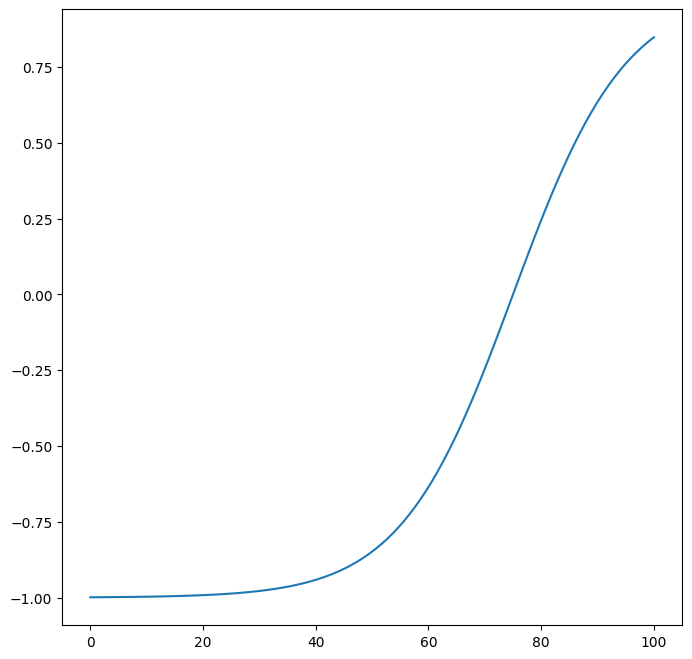

In [154]:
t = np.linspace(0,100,100)
plt.plot(t,np.tanh((t-75)/20))